In [212]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler

input_folder = 'C:/Users/Davide/workspace/SoccerData/Input/'
output_folder = 'C:/Users/Davide/workspace/SoccerData/Output/'

In [213]:
df = pd.read_csv(input_folder + 'dataset.csv', index_col=0)
players = pd.read_json(input_folder + 'players.json')

In [214]:
players.role = [i['code2'] for i in players.role]
players.loc[players[players.wyId.isin(wyId[15:42])].index,'role']= 'MD'
df = df.merge(players[['role', 'wyId']], left_on='playerId', right_on='wyId', how='outer')

In [215]:
df.angle_mean.fillna(df.angle_mean.mean(), inplace=True)
df.angle_std.fillna(0, inplace=True)
df.height.fillna(df.height.mean(), inplace=True)
df.weight.fillna(df.weight.mean(), inplace=True)
df.ambidestro.fillna(df.ambidestro.mean(), inplace=True)
df = df.fillna(0)
df = df[df.role=='MD']
df = df.drop(['matchPeriod', 'matchId', 'role', 'wyId' ], axis=1)


In [216]:
scaler = MinMaxScaler()
cols = ['standard_deviation', 'posizione_media_x', 'posizione_media_y',
        'angle_mean', 'angle_std', 'height', 'weight', 'yellow_card',
        'tempo_medio_tra_eventi', 'gol', 'assist', 'total_distance']
df_sc = scaler.fit_transform(df[cols])
df = pd.concat((pd.DataFrame(df_sc, columns=cols, index=df.index), 
                 df.drop(cols, axis=1)
                 ), axis=1)

In [217]:
wyId = [21001.0, 248950.0, 20495.0,
        70084.0, 25849.0, 135903.0,
       20459.0, 3300.0, 3431.0,
        130.0, 288663.0, 263432.0,
        20461.0, 92966.0, 22883.0,
        37732.0, 20438.0, 625.0,
        40726.0, 7965.0, 14903,
       20443, 3543, 21315,
       285109, 3318, 20879, 265865,
       21171, 114, 286223,
       20845, 22566, 20935,
       116269, 190167,
       3484, 21025, 21169,
       213948, 21123, 15524,
       3313, 14812, 447804,
       11063, 21077, 105334, 21385,
       89186, 20479, 122,
       206314, 3323,
       14943, 8327, 22933]

#temp = df[df.playerId.isin(wyId)]
#print temp.shape
#temp.head()

In [218]:
col = ['00', '01', '02', '03',
       '04', '10', '11', '12', '13', '14', '20', '21', '22', '23', '24', '30',
       '31', '32', '33', '34', '40', '41', '42', '43', '44']

def dropout(row):
    ix = row.values.argsort()[-3:][::-1]
    row.iloc[[i for i in range(len(row)) if i not in ix]] =0
    return row


res = [dropout(i[col]) for n,i in df.drop('playerId',1).iterrows()]
df[col] = pd.DataFrame(res, index= df.index)


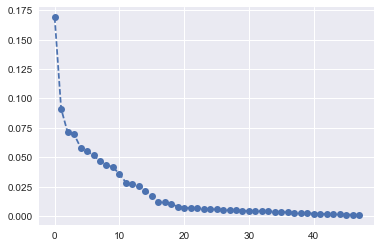

In [219]:
n = 48
pca = PCA(n_components=n)
pca.fit(df.drop('playerId', axis=1))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,'--o')

In [269]:
n = 20
pca = PCA(n_components=n)
pca.fit(df.drop('playerId', axis=1))

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[0.16897959 0.09107845 0.07120506 0.06947835 0.05821254 0.055085
 0.05158185 0.04662422 0.04348333 0.04147092 0.03570346 0.02845304
 0.02689528 0.02591325 0.02162591 0.01684507 0.0122021  0.0116364
 0.01023735 0.00790444]


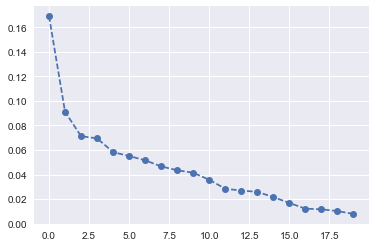

In [270]:
print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,'--o')

In [271]:
sum(pca.explained_variance_ratio_)

0.8946156331847832

In [272]:
df1 = pd.DataFrame(pca.transform(df.drop('playerId', axis=1)), columns=['c_%d' % i for i in range(n)])
df1['playerId'] = df.playerId.values

In [273]:
# from sklearn.decomposition import KernelPCA

# ica = KernelPCA(n_components = n, kernel= 'rbf')
# ica.fit(df.drop('playerId', axis=1))

# df1 = pd.DataFrame(ica.transform(df.drop('playerId', axis=1)), columns=['c_%d' % i for i in range(n)])
# df1['playerId'] = df.playerId.values

In [274]:
df1.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,playerId
0,-0.171700,-0.169741,-0.023049,-0.326039,0.175848,0.401790,-0.077790,0.076310,0.331491,0.032481,...,-0.122228,0.016936,0.034994,0.007318,-0.099096,-0.056937,0.130123,0.058745,-0.061863,114.0
1,-0.239179,-0.043898,0.024582,-0.201998,0.039211,0.090454,0.002100,0.155856,-0.240161,0.358288,...,-0.131786,0.044841,0.039974,-0.063894,-0.114683,-0.121959,0.089369,0.054084,-0.013184,114.0
2,-0.249823,-0.018839,0.236959,-0.121954,0.045951,0.037777,-0.019229,-0.091073,0.095962,0.405522,...,0.110466,0.048449,0.084946,-0.135006,0.041140,0.036800,-0.014792,0.075493,0.072212,114.0
3,-0.320626,-0.152829,0.103982,-0.199636,0.044008,0.018325,-0.143590,0.274898,0.297139,0.199594,...,-0.069366,0.028946,0.068557,0.029604,-0.098615,0.020195,0.022003,0.047420,-0.030373,114.0
4,-0.328567,-0.197848,0.165987,-0.210659,0.066307,0.006239,-0.124449,0.187722,0.297555,0.223860,...,-0.109291,0.006703,-0.018609,-0.013838,-0.102006,0.070823,-0.059288,0.033708,0.010940,114.0


In [275]:
centr = np.array([df1[df1.playerId.isin(wyId[15:18])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[18:21])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[21:24])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[24:28])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[28:31])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[31:34])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[34:36])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[36:39])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[39:42])].drop('playerId', 1).mean().values])

lab_str = ['CDM','BWM', 'DPM','BBM','INM','WDM','RNR','PMR','FAN']

In [276]:
kmeans = KMeans(n_clusters=9, random_state=42).fit(df1.drop('playerId', axis=1))

In [277]:
kmeans.labels_

array([4, 7, 2, ..., 6, 6, 6])

In [278]:
df1['target'] =[lab_str[i] for i in kmeans.labels_]

In [279]:
df1.target.value_counts()

DPM    1667
BWM    1414
RNR    1043
BBM     508
PMR     505
CDM     497
INM     332
FAN     289
WDM     288
Name: target, dtype: int64

In [280]:
def p(id):
    print(players[players.wyId==id].shortName)
    print(df1[df1.playerId==id].target.value_counts())
    print('-------')
    
for id in wyId[15:42]:
    p(id)


66    L. Biglia
Name: shortName, dtype: object
DPM    44
BWM     3
CDM     1
INM     1
PMR     1
WDM     1
Name: target, dtype: int64
-------
228    D. De Rossi
Name: shortName, dtype: object
DPM    43
Name: target, dtype: int64
-------
10    M. de Roon
Name: shortName, dtype: object
DPM    60
INM     1
Name: target, dtype: int64
-------
133    Allan
Name: shortName, dtype: object
BWM    64
INM     4
CDM     1
PMR     1
Name: target, dtype: int64
-------
100    Lucas Leiva
Name: shortName, dtype: object
DPM    58
PMR     6
INM     6
WDM     1
Name: target, dtype: int64
-------
162    T. Rinc\u00f3n
Name: shortName, dtype: object
DPM    59
PMR     7
INM     2
RNR     2
WDM     1
Name: target, dtype: int64
-------
229    M. Pjani\u0107
Name: shortName, dtype: object
CDM    21
FAN    16
WDM    13
INM     4
BWM     2
PMR     2
Name: target, dtype: int64
-------
104    Borja Valero
Name: shortName, dtype: object
BWM    53
WDM     4
DPM     3
CDM     2
INM     2
PMR     2
Name: target, dtype

In [168]:
from sklearn.manifold import TSNE

x = df1.drop('playerId',1).values
X_embedded = TSNE(n_components=2).fit_transform(x)

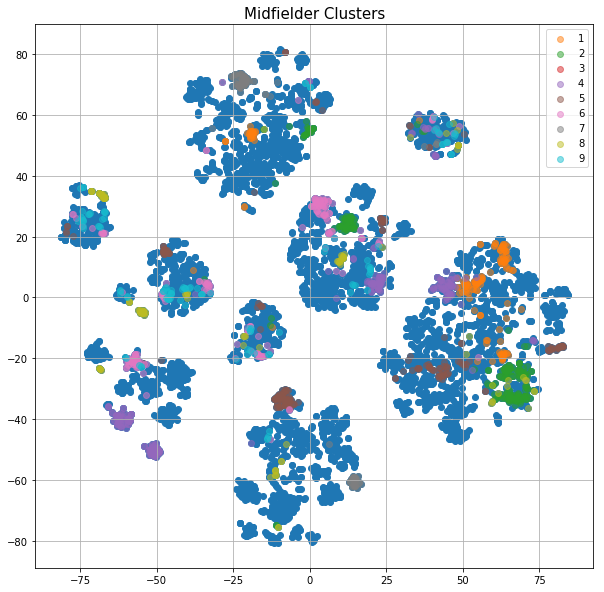

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
plt.title('Midfielder Clusters', fontsize = 15)
plt.scatter(X_embedded[:,0],X_embedded[:,1])

ix = df1.reset_index()[df1.playerId.isin(wyId[15:18])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '1', alpha =0.5)


ix = df1.reset_index()[df1.playerId.isin(wyId[18:21])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '2', alpha =0.5)


ix = df1.reset_index()[df1.playerId.isin(wyId[21:21])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '3', alpha =0.5)


ix = df1.reset_index()[df1.playerId.isin(wyId[24:28])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '4', alpha =0.5)


ix = df1.reset_index()[df1.playerId.isin(wyId[28:31])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '5', alpha =0.5)


ix = df1.reset_index()[df1.playerId.isin(wyId[31:34])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '6', alpha =0.5)

ix = df1.reset_index()[df1.playerId.isin(wyId[34:36])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '7', alpha =0.5)

ix = df1.reset_index()[df1.playerId.isin(wyId[36:39])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '8', alpha =0.5)


ix = df1.reset_index()[df1.playerId.isin(wyId[39:42])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '9', alpha =0.5)


plt.legend(fontsize = 10)
plt.grid()

In [68]:
# fig.savefig(output_folder + 'mid')

In [281]:
from sklearn.externals import joblib

joblib.dump(pca,output_folder + 'pca_mf')
joblib.dump(kmeans,output_folder + 'kmeans_mf')

['C:/Users/Davide/workspace/SoccerData/Output/kmeans_mf']